In [1]:
pip install sklearn-evaluation

Note: you may need to restart the kernel to use updated packages.


In [2]:
__title__ = ''
__author__ = 'Claudio Mori'
__credits__ = 'Sayo Makinwa'
__copyright__ = 'Copyright 2020, Thesis Project'

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# importar script creado para reutilizar funciones separe_standarize_data, obtain_metrics, plot_confussion_matrix
from preproc_metrics import *
# importar script para reutilizar función evaluate con el modelo base, de Random Grid Search y Grid search.
# funcion: evaluate(nombre_modelo, modelo_construido, features_prueba, labels_prueba)
from gs_metrics import *

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import seaborn as sns
sns.set(font_scale=2)

from IPython.core.pylabtools import figsize

from sklearn_evaluation import plot

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as precision
from sklearn.metrics import recall_score as recall
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', None)

In [3]:
# Función para separación de datos y su estandarización con StandardScaler
def separe_standarize_data(X, y):
    # Separación del conjunto de datos en datos de entrenamiento y datos de evaluacion. 30% para datos de evaluación y
    # 70% para datos de entrenamiento
    # X_train, X_test, y_train, y_test = train_test_split(X, y.astype(int), test_size = 0.3)
    train_features, test_features, train_labelapp, test_labelapp = \
        train_test_split(X, y.astype(int), test_size=0.3, train_size=0.7, random_state=15)
    '####################################### Estandarizar datos de 11 features ########################################'
    # Crear objeto estandarizador
    sc = StandardScaler()
    # Se va a estandarizar los datos para:
    # Reducir la variabilidad entre las frecuencias de aparición de cada feature que aparece en las aplicaciones
    # Se ajusta los datos de entrenamiento y transforma los datos de entrenamiento.
    train_features = sc.fit_transform(train_features)
    # Se transforman los datos de prueba
    test_features = sc.fit_transform(test_features)
    
    return train_features, test_features, train_labelapp, test_labelapp




In [4]:
# Funcion para calcular metricas
def obtain_metrics(test_labelapp, y_pred):
    '############################################## Calculo de metricas ###############################################'
    # Dibujando la matriz de confusion
    cm = confusion_matrix(test_labelapp, y_pred)
    print('Confusion Matrix', '\n', cm)

    # Calculando la Exactitud (Accuracy)
    accuracy = acc(test_labelapp, y_pred)
    print('Accuracy: ', accuracy, '-->', format(accuracy, ".2%"))

    # Calculando el ratio de error (Error Rate)
    error_rate = 1 - accuracy
    print('Error Rate: ', error_rate, '-->', format(error_rate, '.2%'))

    # Calculando la Precision (Precision)
    precision_score = precision(test_labelapp, y_pred, average='micro')
    print('Precision: ', precision_score, '-->', format(precision_score, ".2%"))

    # Calculando la Sensibilidad (Recall)
    recall_score = recall(test_labelapp, y_pred)
    print('Recall: ', recall_score, '-->', format(recall_score, ".2%"))

    # Calculando el Valor F (F1 Score)
    f1_score = f1(test_labelapp, y_pred)
    print('F1 Score: ', f1_score, '-->', format(f1_score, ".2%"))

    return error_rate, accuracy, precision_score, recall_score



In [5]:
# Funcion para dibujar matriz de confusion con heatmap de Seaborn
def plot_confussion_matrix(nombre_modelo, test_labelapp, y_pred):
    data = {"y_actual": test_labelapp, "y_predicted": y_pred}
    # print(data)
    df = pd.DataFrame(data, columns=['y_actual', 'y_predicted'])
    confusion_matrix = pd.crosstab(df['y_actual'], df['y_predicted'], rownames=['Actual'], colnames=['Predicted'],
                                   margins=False)
    # print(df)
    # print(confusion_matrix)
    # Confusion_Matrix = ConfusionMatrix(df['y_actual'], df['y_predicted'])
    # Confusion_Matrix.print_stats()

    sn.heatmap(confusion_matrix, annot=True, fmt='g', cbar=True, cmap="YlGnBu", xticklabels=True, yticklabels=True)
    plt.savefig('confussion-matrix-'+nombre_modelo+'.png')
    plt.show()


In [6]:
# Cargando dataset representado por archivo feature_vectors_counts.csv
feature_of_counts = "/home/lechu/Documents/GitHub/Prueba-de-concepto/seleccion_caracteristicas/processed_data" \
                    "/feature_vectors_counts.csv"

# Importando el dataset en forma de archivo .csv.
# Tiene 12 columnas: 11 para mostrar la frecuencia de aparición de los 11 feature extraídos de la aplicacióny 1 para
# la variable target está representada con el label o etiqueta que indica si la aplicación es malware o benigna.
dataset = pd.read_csv(feature_of_counts, index_col=0)

print(
    '####################### MODELO DE CLASIFICACION 1: RANDOM FOREST BASE USANDO 11 FEATURES ########################')
# X: 11 tipos de características (features) 
# permisos solicitaciones, llamadas api restringidas, actividades
# llamadas api sospechosas, permisos usados, servicios
# filtros intent, receptor de mensajes, uses-feature
# urls, proveedor de contenido
X = dataset.iloc[:, 1:12].values
print(X.shape)
print(X,'\n')

# y: etiqueta de la aplicación (0: benigna, 1: malware) (variable target)
y = dataset.iloc[:, 12].values.astype('int')
print(y.shape)
print(y,'\n')



####################### MODELO DE CLASIFICACION 1: RANDOM FOREST BASE USANDO 11 FEATURES ########################
(5598, 11)
[[ 3  0  0 ...  4  3  0]
 [ 3  0  0 ...  2  2  0]
 [ 5  0  0 ... 10  3  0]
 ...
 [13  1  0 ... 14  3  0]
 [25  0  7 ... 16  7  0]
 [ 0  0  0 ...  1  0  0]] 

(5598,)
[1 0 1 ... 1 0 0] 



Text(0.5, 1.0, 'Dataset')

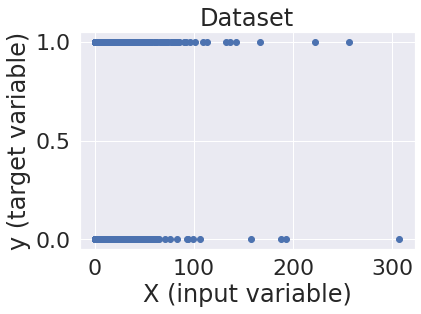

In [7]:
# Grafica de dispersión entre variables de features y label
plt.plot(X,y,'bo')
plt.xlabel('X (input variable)')
plt.ylabel('y (target variable)')
plt.title("Dataset")

In [8]:
# Separacion de datos y Estandarizacion de los mismos
train_features, test_features, train_labelapp, test_labelapp = separe_standarize_data(X, y)
'###################################### MODELO DE CLASIFICACION: RANDOM FOREST ######################################'
# Random Forest usando 11 features
clf_rfc_11f = RandomForestClassifier(n_estimators=1000, criterion='gini',
                                     bootstrap=True, max_depth=100, random_state=15)
# Entrenamiento de modelo
clf_rfc_11f.fit(train_features, train_labelapp)
# Obtención de predicciones
y_train_predicted = clf_rfc_11f.predict(train_features)
y_test_predicted = clf_rfc_11f.predict(test_features)

RF with full trees, Train MSE: 0.07784583971413987, Test MSE: 0.19107142857142856


Text(0, 0.5, 'Random Forest prediction')

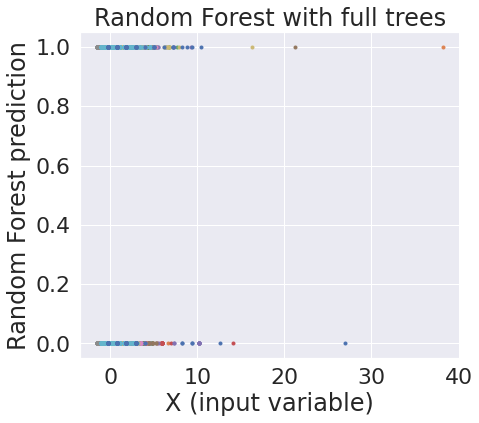

In [9]:
# Calcular Error Cuadrado Medio (Mean Squared Error) para el conjunto de entrenamiento y de prueba de la variable target
mse_train = mean_squared_error(train_labelapp, y_train_predicted)
mse_test = mean_squared_error(test_labelapp, y_test_predicted)
print("RF with full trees, Train MSE: {}, Test MSE: {}".format(mse_train, mse_test))

# Dibujar dispersión de datos de datos de prueba de features y predicciones obtenidas
plt.figure(figsize=(15,6))
plt.subplot(121)
# plt.plot(test_features[:,0], y_test_predicted,'.')
plt.plot(test_features, y_test_predicted,'.')
plt.title("Random Forest with full trees")
plt.xlabel("X (input variable)")
plt.ylabel("Random Forest prediction")


Iteration: 0 Train mse: 0.1388463501786626 Test mse: 0.2511904761904762
Iteration: 1 Train mse: 0.1296579887697805 Test mse: 0.24107142857142858
Iteration: 2 Train mse: 0.10515569167942827 Test mse: 0.21904761904761905
Iteration: 3 Train mse: 0.10209290454313426 Test mse: 0.2261904761904762
Iteration: 4 Train mse: 0.091628381827463 Test mse: 0.2119047619047619
Iteration: 5 Train mse: 0.09264931087289434 Test mse: 0.21071428571428572
Iteration: 6 Train mse: 0.08856559469116897 Test mse: 0.21071428571428572
Iteration: 7 Train mse: 0.08575803981623277 Test mse: 0.20535714285714285
Iteration: 8 Train mse: 0.08473711077080143 Test mse: 0.2017857142857143
Iteration: 9 Train mse: 0.08269525267993874 Test mse: 0.2005952380952381
Iteration: 10 Train mse: 0.08295048494129657 Test mse: 0.20952380952380953
Iteration: 11 Train mse: 0.0809086268504339 Test mse: 0.20833333333333334
Iteration: 12 Train mse: 0.08141909137314957 Test mse: 0.20714285714285716
Iteration: 13 Train mse: 0.07988769780500256 

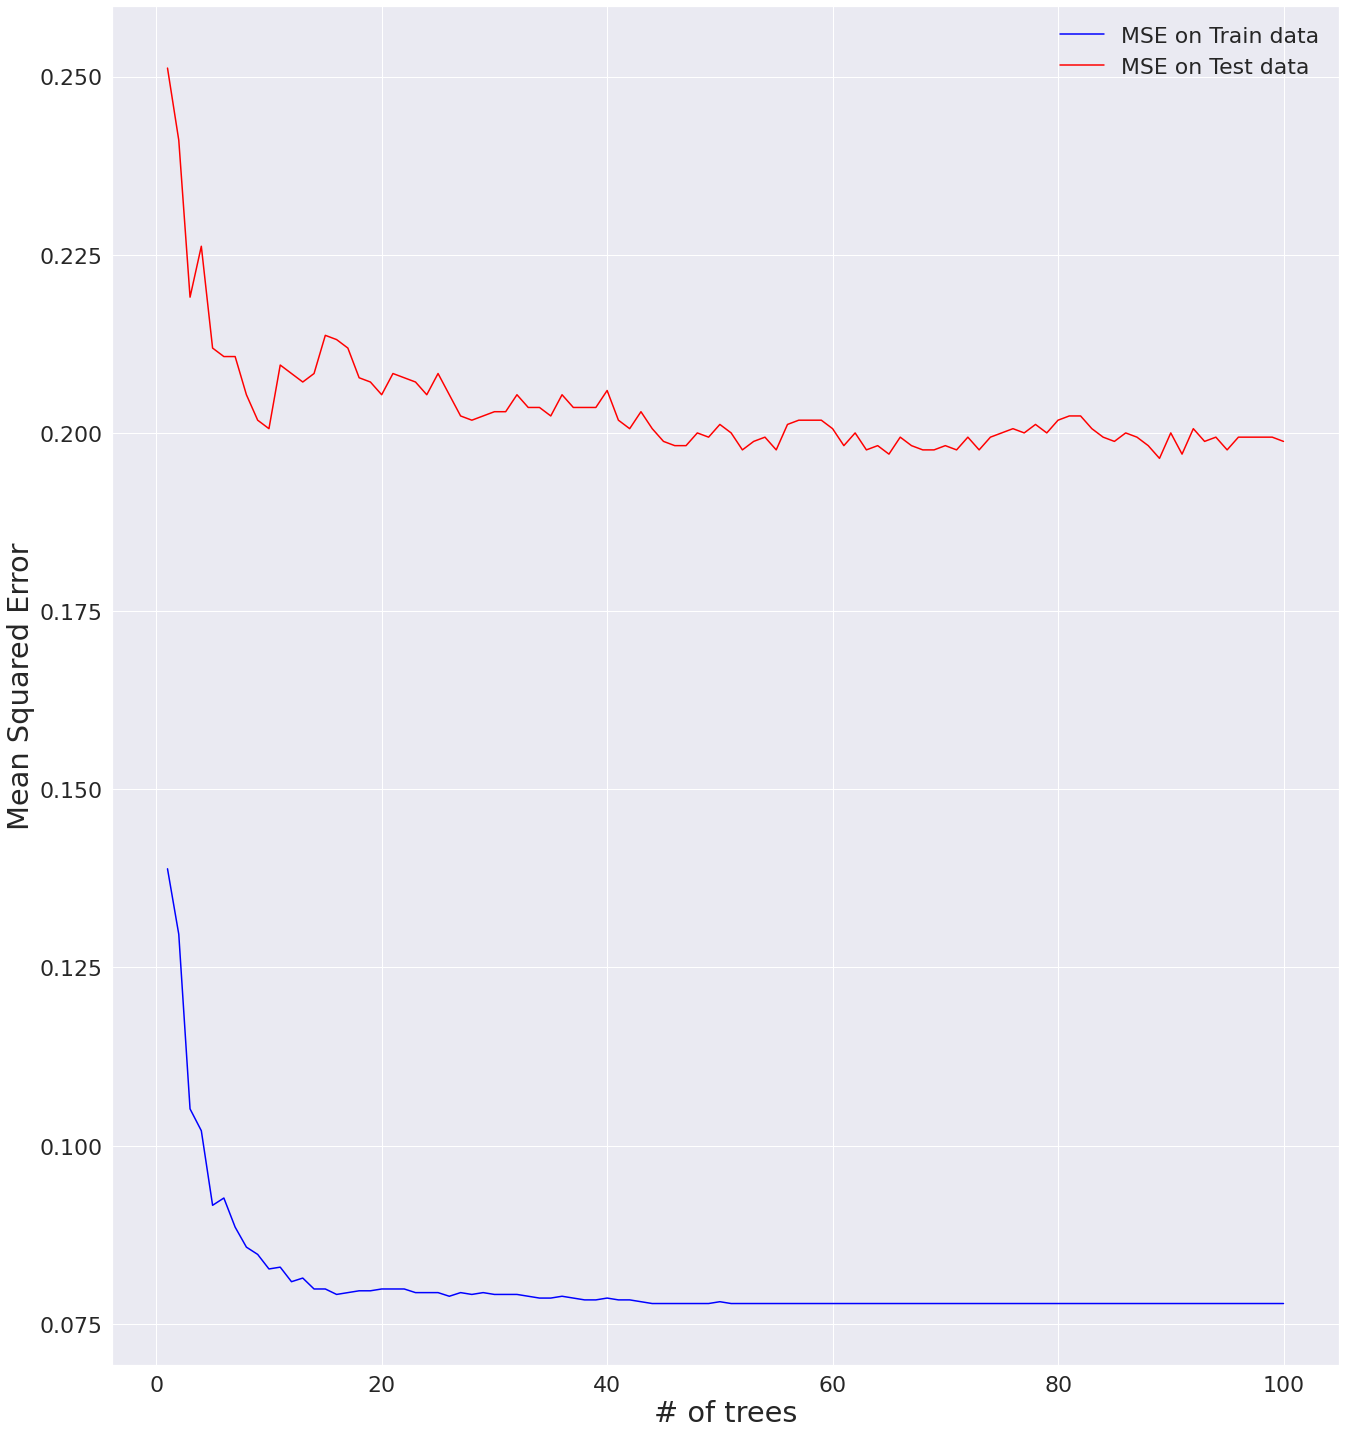

In [19]:
# Modelo de Random Forest con un árbol
clf_rfc_11f = RandomForestClassifier(n_estimators=1, criterion='gini', 
                                     bootstrap=True, max_depth=100, 
                                     random_state=15)
trees, train_loss, test_loss = [], [], []
# Entrenamiento con iteraciones
for iter in range(100):
    # Entrenamiento del modelo
    clf_rfc_11f.fit(train_features, train_labelapp)
    # Obtención de predicciones
    y_train_pred_rfc = clf_rfc_11f.predict(train_features)
    y_test_pred_rfc = clf_rfc_11f.predict(test_features)
    # Cálculo de Error Cuadrado Medio (MSE)
    mse_train = mean_squared_error(train_labelapp, y_train_pred_rfc)
    mse_test = mean_squared_error(test_labelapp, y_test_pred_rfc)
    print("Iteration: {} Train mse: {} Test mse: {}".format(iter, mse_train, mse_test))
    # Acumulación de árboles
    trees += [clf_rfc_11f.n_estimators]
    train_loss += [mse_train]
    test_loss += [mse_test]
    # Aumento de árboles en uno
    clf_rfc_11f.n_estimators += 1
    
# Dibujar gráfica de número de árboles vs MSEs calculados. 
# Se podrá ver si el overfitting incrementa o no cuando se añade más árboles
plt.figure(figsize=(22,25))  
plt.plot(trees, train_loss, color="blue", label="MSE on Train data")
plt.plot(trees, test_loss, color="red", label="MSE on Test data")
plt.xlabel("# of trees", fontsize='large')
plt.ylabel("Mean Squared Error",fontsize='large');
plt.legend()

In [90]:
# Modelo de Soporte Vectorial
clf_svc_top11f = SVC(C=1.0, kernel='rbf', gamma=0.73, max_iter=900, random_state=15)
# Entrenamiento del modelo
clf_svc_top11f.fit(train_features, train_labelapp)
# Obtención de predicciones
y_train_pred_svc = clf_svc_top11f.predict(train_features)
y_test_pred_svc = clf_svc_top11f.predict(test_features)

/home/lechu/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=900).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


################################### Resultados de los modelos que usan 11 features ###################################
################################### Métricas de Random Forest ###################################
Confusion Matrix 
 [[591 194]
 [140 755]]
Accuracy:  0.8011904761904762 --> 80.12%
Error Rate:  0.19880952380952377 --> 19.88%
Precision:  0.8011904761904762 --> 80.12%
Recall:  0.8435754189944135 --> 84.36%
F1 Score:  0.8188720173535792 --> 81.89%


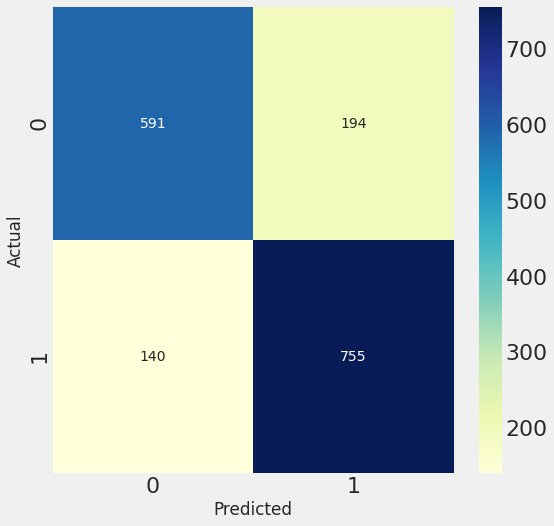

################################### Métricas de Soporte Vectorial ###################################
Confusion Matrix 
 [[558 227]
 [182 713]]
Accuracy:  0.756547619047619 --> 75.65%
Error Rate:  0.24345238095238098 --> 24.35%
Precision:  0.756547619047619 --> 75.65%
Recall:  0.7966480446927374 --> 79.66%
F1 Score:  0.7771117166212534 --> 77.71%


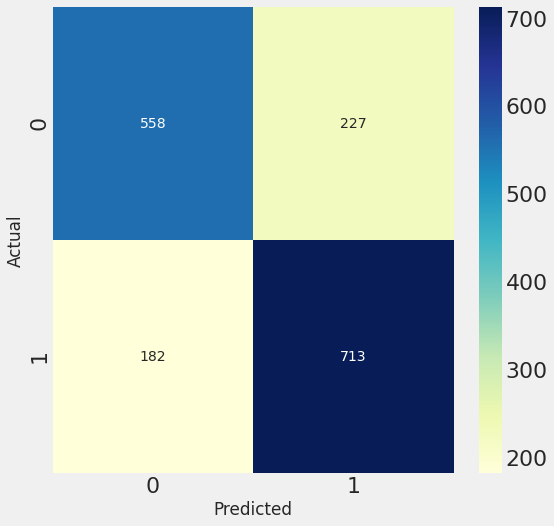

In [92]:
print('################################### Resultados de los modelos que usan 11 features ###################################')
print('################################### Métricas de Random Forest ###################################')
error_rate_rfc11f, accuracy_rfc11f, precision_rfc11f, recall_rfc11f = obtain_metrics(test_labelapp, y_test_pred_rfc)
plot_confussion_matrix('rfc-11features', test_labelapp, y_test_pred_rfc)
print('################################### Métricas de Soporte Vectorial ###################################')
error_rate_svc11f, accuracy_svc11f, precision_svc11f, recall_svc11f = obtain_metrics(test_labelapp, y_test_pred_svc)
plot_confussion_matrix('svc-11features', test_labelapp, y_test_pred_svc)


################## MODELO DE CLASIFICACION 2: RANDOM FOREST USANDO FEATURES SELECCIONADOS ####################
################################## Encontrando features importantes con Scikit-learn ##################################
permisos_solicitados    0.196472
api_restringidas        0.156400
actividades             0.141577
api_sospechosas         0.138931
permisos_usados         0.109460
servicios               0.077372
filtros_intent          0.065036
receptor_mensajes       0.045798
uses-feature            0.026363
urls                    0.024864
proveedor_contenido     0.017725
dtype: float64


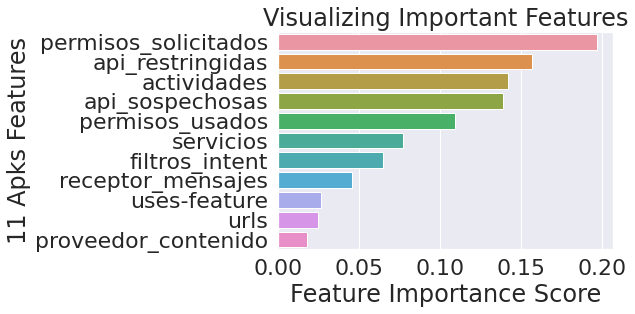

In [82]:
print('################## MODELO DE CLASIFICACION 2: RANDOM FOREST USANDO FEATURES SELECCIONADOS ####################')
print('################################## Encontrando features importantes con Scikit-learn ##################################')
clf = RandomForestClassifier(n_estimators=1000, criterion='gini', bootstrap=True, max_depth=100, random_state=15)
clf.fit(train_features, train_labelapp)

feature_names = list(dataset.iloc[:, 1:12].columns)
# print(feature_names)

# Calcular la importancia de cada uno de los 11 features
feature_importance = pd.Series(clf.feature_importances_, index=feature_names).sort_values(ascending=False)
print(feature_importance)

'########################################## Grafico de barras con importantacia features ##########################################'
# Crear barras de features del grafico
sns.barplot(x=feature_importance, y=feature_importance.index, seed=15)
# Añadir etiquetas de los features al grafico
plt.xlabel('Feature Importance Score')
plt.ylabel('11 Apks Features')
plt.title("Visualizing Important Features")
# plt.legend
plt.savefig('barras-importancia-11features.png')
plt.show()

In [88]:
'##################################### Random Forest con 11 features y SVC con 5 features  ######################################'
# Conjunto de 11 features para usar con RF
X = dataset.iloc[:, 1:12].values
# Conjunto de 5 primeros features (X_5) y de etiquetas (y)
X_5f = dataset[['permisos_solicitados', 'api_restringidas', 'actividades', 'api_sospechosas', 'permisos_usados']]

y = dataset.iloc[:, 12].values

# Separacion de datos y Estandarizacion de los mismos
# conjunto de datos de entrenamiento y prueba para usar con ...
# Random Forest
train_features_11, test_features_11, train_labelapp_11, test_labelapp_11 = separe_standarize_data(X, y)
# Soporte Vectorial
train_features_5, test_features_5, train_labelapp_5, test_labelapp_5 = separe_standarize_data(X_5f, y)

# Modelo de clasificacion: Random Forest usando 5 top eatures
clf_rfc_11f = RandomForestClassifier(n_estimators=1000, criterion='gini', bootstrap=True, max_depth=100, random_state=15)
clf_svc_top5f = SVC(C=1.0, kernel='rbf', gamma=0.73, max_iter=900, random_state=15)

# Entrenamiento de modelos
clf_rfc_11f.fit(train_features_11, train_labelapp_11)
clf_svc_top5f.fit(train_features_5, train_labelapp_5)

# Obtención de perdicciones
y_pred_rfc11f = clf_rfc_11f.predict(test_features_11)
y_pred_svc5f = clf_svc_top5f.predict(test_features_5)

/home/lechu/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=900).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


######################## Resultados del modelo usando features con mayor importancia #########################
########### Métricas de RF usando 11 features ###########
Confusion Matrix 
 [[597 188]
 [133 762]]
Accuracy:  0.8089285714285714 --> 80.89%
Error Rate:  0.19107142857142856 --> 19.11%
Precision:  0.8089285714285714 --> 80.89%
Recall:  0.8513966480446927 --> 85.14%
F1 Score:  0.8260162601626017 --> 82.60%


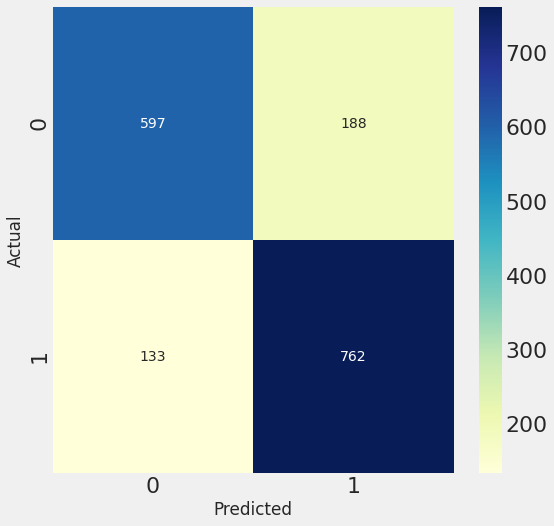

########### Métricas de SV usando 5 features más importantes ###########
Confusion Matrix 
 [[570 215]
 [279 616]]
Accuracy:  0.705952380952381 --> 70.60%
Error Rate:  0.294047619047619 --> 29.40%
Precision:  0.705952380952381 --> 70.60%
Recall:  0.6882681564245811 --> 68.83%
F1 Score:  0.7137891077636154 --> 71.38%


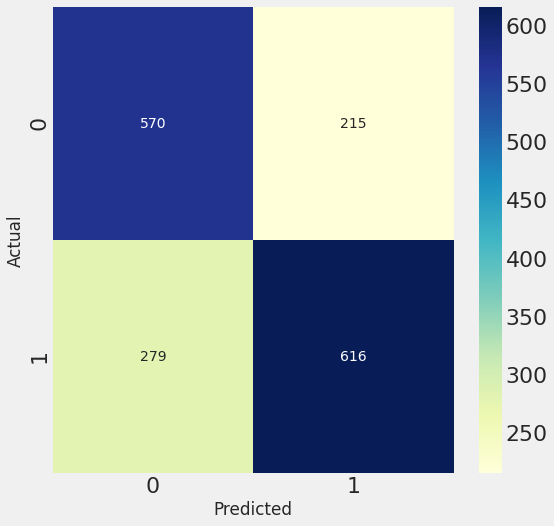

In [93]:
print('######################## Resultados del modelo usando features con mayor importancia #########################')
print('########### Métricas de RF usando 11 features ###########' )
error_rate_rfc11f, accuracy_rfc11f, precision_rfc11f, recall_rfc11f = obtain_metrics(test_labelapp_11, y_pred_rfc11f)
plot_confussion_matrix('rfc-11features', test_labelapp_11, y_pred_rfc11f)

print('########### Métricas de SV usando 5 features más importantes ###########' )
error_rate_svc5f, accuracy_svc5f, precision_svc5f, recall_svc5f = obtain_metrics(test_labelapp_5, y_pred_svc5f)
plot_confussion_matrix('svc_5f', test_labelapp_5, y_pred_svc5f)


In [85]:
'##################################### Modelos de Random Forest usando diferentes cantidades de features  ######################################'
# Crear modelo en base a las características más relevantes

# ELEGIR UNO DE LOS CONJUNTOS DE FEATURES PARA USARLO EN EL ENTRENAMIENTO DEL MODELO
# low 4 features
X_4l = dataset[['proveedor_contenido', 'urls', 'uses-feature', 'receptor_mensajes']]
# low 6 features
X_6l = dataset[['proveedor_contenido', 'urls', 'uses-feature', 'receptor_mensajes', 'filtros_intent', 'servicios']]
# top 5 features
X_5f = dataset[['permisos_solicitados', 'api_restringidas', 'actividades', 'api_sospechosas', 'permisos_usados']]
# top 7 features
X_7 = dataset[['permisos_solicitados', 'api_restringidas', 'actividades', 'api_sospechosas', 'permisos_usados', 
               'servicios', 'filtros_intent']]
# top 8 features
X_8 = dataset[['permisos_solicitados', 'api_restringidas', 'actividades', 'api_sospechosas', 'permisos_usados',
             'servicios', 'filtros_intent', 'receptor_mensajes']]
# top 10 features
X_10 = dataset[['permisos_solicitados', 'api_restringidas', 'actividades', 'api_sospechosas', 'permisos_usados', 
                'servicios', 'filtros_intent', 'receptor_mensajes', 'urls', 'uses-feature']]
y = dataset.iloc[:, 12].values

# Separacion de datos y Estandarizacion de los mismos
train_features_4l, test_features_4l, train_labelapp_4l, test_labelapp_4l = separe_standarize_data(X_4l, y)
train_features_6l, test_features_6l, train_labelapp_6l, test_labelapp_6l = separe_standarize_data(X_6l, y)
train_features_5, test_features_5, train_labelapp_5, test_labelapp_5 = separe_standarize_data(X_5f, y)
train_features_7, test_features_7, train_labelapp_7, test_labelapp_7 = separe_standarize_data(X_7, y)
train_features_8, test_features_8, train_labelapp_8, test_labelapp_8 = separe_standarize_data(X_8, y)
train_features_10, test_features_10, train_labelapp_10, test_labelapp_10 = separe_standarize_data(X_10, y)

# Modelo de clasificacion 2: Random Forest usando 10 top features, 1000 arboles y con profundidad de 100 cada uno
clf_rfc_low4f = RandomForestClassifier(n_estimators=1000, criterion='gini', bootstrap=True, max_depth=100, random_state=15)
clf_rfc_low6f = RandomForestClassifier(n_estimators=1000, criterion='gini', bootstrap=True, max_depth=100, random_state=15)
clf_rfc_top5f = RandomForestClassifier(n_estimators=1000, criterion='gini', bootstrap=True, max_depth=100, random_state=15)
clf_rfc_top7f = RandomForestClassifier(n_estimators=1000, criterion='gini', bootstrap=True, max_depth=100, random_state=15)
clf_rfc_top8f = RandomForestClassifier(n_estimators=1000, criterion='gini', bootstrap=True, max_depth=100, random_state=15)
clf_rfc_top10f = RandomForestClassifier(n_estimators=1000, criterion='gini', bootstrap=True, max_depth=100, random_state=15)

# Entrenamiento de modeloS
clf_rfc_low4f.fit(train_features_4l, train_labelapp_4l)
clf_rfc_low6f.fit(train_features_6l, train_labelapp_6l)
clf_rfc_top5f.fit(train_features_5, train_labelapp_5)
clf_rfc_top7f.fit(train_features_7, train_labelapp_7)
clf_rfc_top8f.fit(train_features_8, train_labelapp_10)
clf_rfc_top10f.fit(train_features_10, train_labelapp_10)

# Obtención de perdicciones
y_pred_4lf = clf_rfc_low4f.predict(test_features_4l)
y_pred_6lf = clf_rfc_low6f.predict(test_features_6l)
y_pred_5f = clf_rfc_top5f.predict(test_features_5)
y_pred_7f = clf_rfc_top7f.predict(test_features_7)
y_pred_8f = clf_rfc_top8f.predict(test_features_8)
y_pred_10f = clf_rfc_top10f.predict(test_features_10)

######################## Resultados del modelo usando features con mayor importancia #########################
########### Métricas y matriz de confusion obtenidas para ###########
########### 4 últimos features ###########
Confusion Matrix 
 [[562 223]
 [467 428]]
Accuracy:  0.5892857142857143 --> 58.93%
Error Rate:  0.4107142857142857 --> 41.07%
Precision:  0.5892857142857143 --> 58.93%
Recall:  0.4782122905027933 --> 47.82%
F1 Score:  0.5536869340232858 --> 55.37%


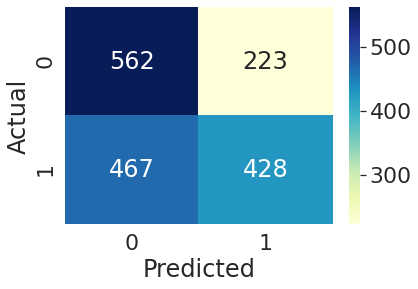

########### 6 últimos features ###########
Confusion Matrix 
 [[613 172]
 [432 463]]
Accuracy:  0.6404761904761904 --> 64.05%
Error Rate:  0.3595238095238096 --> 35.95%
Precision:  0.6404761904761904 --> 64.05%
Recall:  0.5173184357541899 --> 51.73%
F1 Score:  0.6052287581699345 --> 60.52%


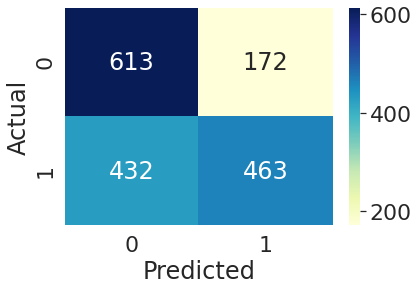

########### 5 primeros features ###########
Confusion Matrix 
 [[592 193]
 [160 735]]
Accuracy:  0.7898809523809524 --> 78.99%
Error Rate:  0.21011904761904765 --> 21.01%
Precision:  0.7898809523809524 --> 78.99%
Recall:  0.8212290502793296 --> 82.12%
F1 Score:  0.8063631376851345 --> 80.64%


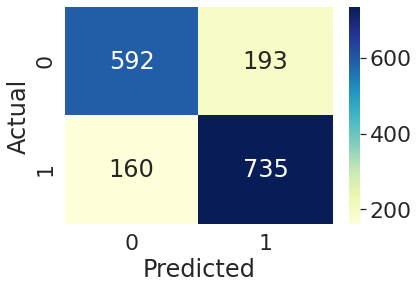

########### 7 primeros features ###########
Confusion Matrix 
 [[592 193]
 [142 753]]
Accuracy:  0.8005952380952381 --> 80.06%
Error Rate:  0.19940476190476186 --> 19.94%
Precision:  0.8005952380952381 --> 80.06%
Recall:  0.841340782122905 --> 84.13%
F1 Score:  0.8180336773492666 --> 81.80%


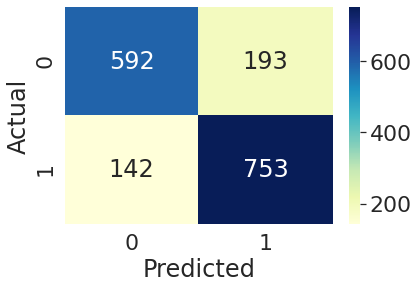

########### 8 primeros features ###########
Confusion Matrix 
 [[597 188]
 [141 754]]
Accuracy:  0.8041666666666667 --> 80.42%
Error Rate:  0.1958333333333333 --> 19.58%
Precision:  0.8041666666666667 --> 80.42%
Recall:  0.8424581005586592 --> 84.25%
F1 Score:  0.8209036472509527 --> 82.09%


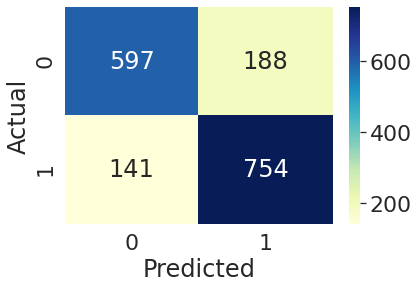

########### 10 primeros features ###########
Confusion Matrix 
 [[599 186]
 [138 757]]
Accuracy:  0.8071428571428572 --> 80.71%
Error Rate:  0.19285714285714284 --> 19.29%
Precision:  0.8071428571428572 --> 80.71%
Recall:  0.8458100558659218 --> 84.58%
F1 Score:  0.823721436343852 --> 82.37%


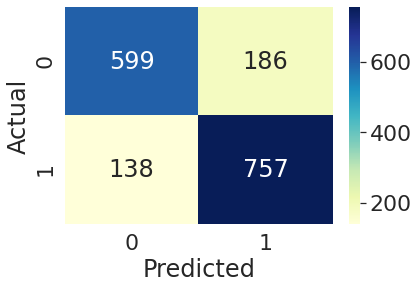

In [86]:
print('######################## Resultados del modelo usando features con mayor importancia #########################')
print('########### Métricas y matriz de confusion obtenidas para ###########' )
print('########### 4 últimos features ###########' )
error_rate_rfc4lf, accuracy_rfc4lf, precision_rfc4lf, recall_rfc4lf = obtain_metrics(test_labelapp_4l, y_pred_4lf)
plot_confussion_matrix('rfc_4lf', test_labelapp_4l, y_pred_4lf)
print('########### 6 últimos features ###########' )
error_rate_rfc6lf, accuracy_rfc6lf, precision_rfc6lf, recall_rfc6lf = obtain_metrics(test_labelapp_6l, y_pred_6lf)
plot_confussion_matrix('rfc_6lf', test_labelapp_6l, y_pred_6lf)
print('########### 5 primeros features ###########' )
error_rate_rfc5f, accuracy_rfc5f, precision_rfc5f, recall_rfc5f = obtain_metrics(test_labelapp_5, y_pred_5f)
plot_confussion_matrix('rfc_5f', test_labelapp_5, y_pred_5f)
print('########### 7 primeros features ###########' )
error_rate_rfc7f, accuracy_rfc7f, precision_rfc7f, recall_rfc7f = obtain_metrics(test_labelapp_7, y_pred_7f)
plot_confussion_matrix('rfc_7f', test_labelapp_7, y_pred_7f)
print('########### 8 primeros features ###########' )
error_rate_rfc8f, accuracy_rfc8f, precision_rfc8f, recall_rfc8f = obtain_metrics(test_labelapp_8, y_pred_8f)
plot_confussion_matrix('rfc_8f', test_labelapp_8, y_pred_8f)
print('########### 10 primeros features ###########' )
error_rate_rfc10f, accuracy_rfc10f, precision_rfc10f, recall_rfc10f = obtain_metrics(test_labelapp_10, y_pred_10f)
plot_confussion_matrix('rfc_10f', test_labelapp_10, y_pred_10f)

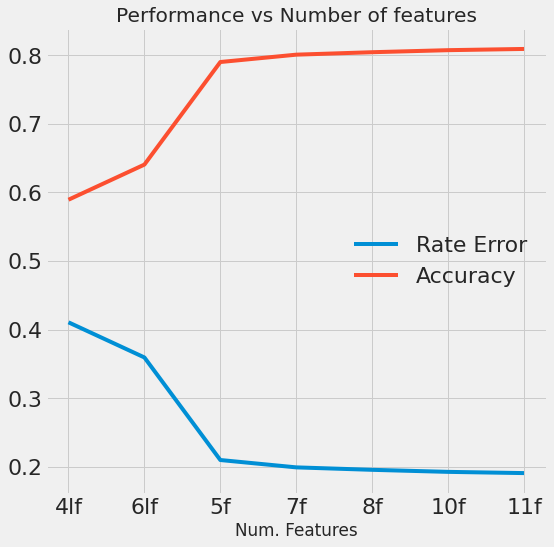

In [87]:
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(['4lf','6lf','5f','7f','8f','10f','11f'], [error_rate_rfc4lf, error_rate_rfc6lf, error_rate_rfc5f, error_rate_rfc7f, error_rate_rfc8f, error_rate_rfc10f, error_rate_rfc11f], label='Rate Error')
plt.plot(['4lf','6lf','5f','7f','8f','10f','11f'], [accuracy_rfc4lf, accuracy_rfc6lf, accuracy_rfc5f, accuracy_rfc7f, accuracy_rfc8f, accuracy_rfc10f, accuracy_rfc11f], label='Accuracy')
plt.xlabel('Num. Features')
plt.ylabel('')
plt.legend()
plt.title('Performance vs Number of features')
plt.savefig('numfeaturesvsperformance.png')
plt.show()

In [13]:
print('############################## ELABORACION DE GRILLA DE BUSQUEDA ALEATORIA CON CV ##############################')
X = dataset.iloc[:, 1:12].values
y = dataset.iloc[:, 12].values

# Separacion y estandarizacion de datos
train_features, test_features, train_labelapp, test_labelapp = separe_standarize_data(X, y)

clf1_rfc = RandomForestClassifier(random_state=15)

from pprint import pprint

# Visualizar parámetros usados por nuestro bosque
print('Parametros usados por el clasificador de Bosque Aleatorio:\n')
print(clf1_rfc.get_params('\n'))

############################## ELABORACION DE GRILLA DE BUSQUEDA ALEATORIA CON CV ##############################
Parametros usados por el clasificador de Bosque Aleatorio:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 15, 'verbose': 0, 'warm_start': False}


In [14]:
# Numero de arboles en el bosque aleatorio
n_estimators = [int(x) for x in np.linspace(start=200, stop=14000, num=10)]
# Funcion para medir calidad de las divisiones
criterion = ['gini', 'entropy']
# Numero de features a considerar en cada division
max_features = ['sqrt', 'log2']
# Numero maximo de niveles en el arbol
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Numero minimo de muestras requeridas para dividir un nodo
min_samples_split = [2, 5, 10]
# Numero minimo de muestras requeridas en cada nodo hoja
min_samples_leaf = [1, 2, 4]
# Metodo de seleccion de muestras para el entrenamiento de cada arbol
bootstrap = [True, False]

# Crear la grilla aleatoria
random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint('\n')
# Mostrar grilla
print('Grilla de búsqueda aleatoria:')
pprint(random_grid)

pprint('\n')

'\n'
Grilla de búsqueda aleatoria:
{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 1733, 3266, 4800, 6333, 7866, 9400, 10933, 12466, 14000]}
'\n'


In [ ]:
pprint('##################################### Buscando mejores hiperparametros: #####################################')
# Usamos la grilla aleatoria para buscar los mejores hiperparámetros
# Primero, creamos el modelo base a tunear
clf_rfc = RandomForestClassifier(random_state=15)
# Luego, realizamos una búsqueda aleatoria de parámetros, utilizando la validación cruzada de 3 iteraciones
# Buscaremos a través de combinaciones diferentes y usaremos todos los núcleos disponibles
clf_rf_random = RandomizedSearchCV(estimator=clf_rfc, param_distributions=random_grid,
                                   n_iter=100, cv=5, verbose=4, random_state=15, n_jobs=6,
                                   return_train_score=True, scoring='neg_mean_absolute_error')
# 500 iteaciones y 8 subconjuntos
# clf_rf_random = RandomizedSearchCV(estimator=clf_rfc, param_distributions=random_grid, n_iter=500, cv=8, verbose=4,
# random_state=15, n_jobs=-1)

# Entrenaremos el modelo de búsqueda aleatoria
clf_rf_random.fit(train_features, train_labelapp)




In [ ]:
# Mostrar todos los resultados de CV y ordenarlos según el rendimiento de prueba
random_results = pd.DataFrame(clf_rf_random.cv_results_).sort_values('mean_test_score', ascending=False)
# Mostrar los 30 primeros resultados
print(random_results.head(30))


In [ ]:
# Ver mejores parámetros al ajustar la búsqueda aleatoria
pprint('Mejores hiperparametros:')
pprint(clf_rf_random.best_params_)
pprint('\n')

In [ ]:
print(clf_rf_random.best_estimator_)

In [ ]:
def evaluate(model_name, model, testing_features, test_labels):
    np.seterr(divide='ignore', invalid='ignore')
    predictions = model.predict(testing_features)
    accuracy = acc(test_labels, predictions)
    error_rate = 1 - accuracy
    precision_score = precision(test_labels, predictions)
    recall_score = recall(test_labels, predictions)
    f1_score = f1(test_labels, predictions)
    print('Model Performance del' + model_name)
    print('Error Rate: {:0.6f} degrees.'.format(error_rate))
    print('Accuracy = {:0.6f}%.'.format(accuracy))
    print('Precision = {:0.6f}%.'.format(precision_score))
    print('Recall = {:0.6f}%.'.format(recall_score))
    print('F1 Score = {:0.6f}%.'.format(f1_score))

    return predictions, error_rate, accuracy, precision_score, recall_score, f1_score


In [ ]:
# Vamos a comparar un modelo base vs el mejor modelo de búsqueda aleatoria
# Modelo base: este modelo contiene 1000 arboles cada uno con un nivel de 100; usa el metodo de seleccion de bootstrap
# y el criterio gini
base_model_clf1 = RandomForestClassifier(n_estimators=1000, criterion='gini',
                                         max_features='auto', max_depth=100,
                                         min_samples_split=5, min_samples_leaf=2,
                                         bootstrap=True, random_state=15)
# Entrenar modelo base que usa 11f ahora con 3 nuevos parametros de max_features, min_samples_split, min_samples_leaf
base_model_clf1.fit(train_features, train_labelapp)

print('########################## MODELO DE CLASIFICACION 3: RANDOM FOREST BASE OPTIMIZADO ##########################')
print(base_model_clf1)
# Calculo de metricas: Exactitud, Precision, Sensibilidad, Valor F
y_prec_b, b_error, b_accuracy, b_precision, b_recall, b_f1 = evaluate('Modelo Base Optimizado RF', base_model_clf1,
                                                                      test_features,
                                                                      test_labelapp)
# Dibujar matriz de confusión de modelo base
plot_confussion_matrix('rfc-11features-optimized', test_labelapp, y_prec_b)

print('############################ MODELO DE CLASIFICACION 4: RANDOM GRID SEARCH CON CV #############################')
# Mejor modelo de búsqueda aleatoria que usara los mejores hiperparametros obtenidos
best_random = clf_rf_random.best_estimator_
pprint(best_random)
# Calculo de metricas del modelo. Este modelo ya se entreno previamente. Ver la linea 333.
y_pred_rd, rd_error, rd_accuracy, rd_precision, rd_recall, rd_f1 = evaluate('Mejor modelo de Random Search con CV',
                                                                            best_random, test_features, test_labelapp)
# Dibujar matriz de confusión de mejor modelo de Random Grid Search
plot_confussion_matrix('rfc-RandomGridSearchCV', test_labelapp, y_pred_rd)

In [ ]:
# Mostrar mejoras en metricas
print('Improvement (Error Rate) of {:0.6f}%.'.format(100 * (rd_error - b_error) / b_error))
print('Improvement (Accuracy) of {:0.6f}%.'.format(100 * (rd_accuracy - b_accuracy) / b_accuracy))
print('Improvement (Precision) of {:0.6f}%.'.format(100 * (rd_precision - b_precision) / b_precision))
print('Improvement (Recall) of {:0.6f}%.'.format(100 * (rd_recall - b_recall) / b_recall))
print('Improvement (F1 Score) of {:0.6f}%.'.format(100 * (rd_f1 - b_f1) / b_f1))


In [ ]:
print('################################## ELABORACION DE GRILLA DE BUSQUEDA CON CV ##################################')

# Crear grilla de parametros basado en los resultados de la búsqueda aleatoria
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': ['log2'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'criterion': ['gini'],
    'n_estimators': [400, 1000, 1400, 1800]
}

# Crear rango de arboles a evaluar
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 
                               550, 600, 650, 700, 750, 800, 1000, 1400]}
# Instanciar modelo de grid search
grid_search = GridSearchCV(estimator=best_random, param_grid=trees_grid, cv=6,
                           n_jobs=6, verbose=2, scoring='neg_mean_absolute_error',
                           return_train_score=True)

# Ajustar la grilla de busqueda a los datos
grid_search.fit(train_features, train_labelapp)



In [ ]:
print(grid_search.best_estimator_)

In [ ]:
# Mostrar resultados de Grid Search
grid_results = pd.DataFrame(grid_search.cv_results_)
print(grid_results.head(30))
print('\n')

In [ ]:
print('################################ MODELO DE CLASIFICACION 5: GRID SEARCH CON CV ################################')

# Obtener mejores parametros
print('Mejores parametros de la grilla de busqueda', grid_search.best_params_)
# Obtener mejor estimador de la grilla de busqueda
best_grid = grid_search.best_estimator_
y_pred_gs, grid_err, grid_acc, grid_prec, grid_recall, grid_f1, = evaluate('Mejor modelo de Grid Search con CV',
                                                                           best_grid, test_features, test_labelapp)
# Dibujar matriz de confusión de mejor modelo de Grid Search
plot_confussion_matrix('rfc-GridSearchCV', test_labelapp, y_pred_gs)

In [ ]:
# Mostrar mejoras en metricas
print('Improvement (Error Rate) of {:0.6f}%.'.format(100 * (grid_err - b_error) / b_error))
print('Improvement (Accuracy) of {:0.6f}%.'.format(100 * (grid_acc - b_accuracy) / b_accuracy))
print('Improvement (Precision) of {:0.6f}%.'.format(100 * (grid_prec - b_precision) / b_precision))
print('Improvement (Recall) of {:0.6f}%.'.format(100 * (grid_recall - b_recall) / b_recall))
print('Improvement (F1 Score) of {:0.6f}%.'.format(100 * (grid_f1 - b_f1) / b_f1))


In [ ]:
print('################################ MODELO DE CLASIFICACION 6: SOPORTE VECTORIAL ################################')
pd.set_option('display.max_columns', None)

# paths to fill
feature_of_counts = "/home/lechu/Documents/GitHub/Prueba-de-concepto/seleccion_caracteristicas/processed_data" \
                        "/feature_vectors_counts.csv"

# Importando el dataset en forma de archivo .csv. El archivo se llama feature_vectors_counts.csv
# Tiene 12 colmumnas: 11 para mostrar la frecuencia de aparición de los 11 feature extraídos de la aplicacióny 1 para
# la varialbe target representada con el label o etiqueta que indica si la aplicación es malware o benigna.
dataset = pd.read_csv(feature_of_counts, index_col=0)

print('######################### MODELO DE CLASIFICACION 6: SVC USANDO 11 FEATURES ##########################')

# X: 11 tipos de atributo (variables independientes)
X = dataset.iloc[:, 1:12].values
# y: etiqueta de la aplicación (0: benigna, 1: malware) (variable target)
y = dataset.iloc[:, 12].values

# Separacion y estandarizacion de datos
train_features, test_features, train_labelapp, test_labelapp = separe_standarize_data(X, y)

# Modelo de clasificacion 6: Soporte Vectorial
clf_svc = SVC(C=1.0, kernel='rbf', gamma=0.73, max_iter=1000, random_state=15)
# Entrenamiento del modelo
clf_svc.fit(train_features, train_labelapp)
# Obtención de predicciones
y_pred = clf_svc.predict(test_features)

# Calcular metricas de Accuracy, Error Rate, Precision, Recall, F1 Score
error_rate_svc, accuracy_svc, precision_svc, recall_svc = obtain_metrics(test_labelapp, y_pred)
# Graficar la matriz de confusion
plot_confussion_matrix('svc', test_labelapp, y_pred)

In [ ]:
'############################ Comparacion de resultados entre 5 modelos de Bosque Aleatorio ###########################'
# Los modelos son:
# (1)Modelo Base con 11 features de entrada y 5 parametros (n_estimators, criterion, max_depth, bootstrap, random_state)
# (2)Modelo con 8 features de entrada y los 5 anteriores parametros
# (3)Modelo Base con 11 features de entrada y 8 parametros (n_estimators, criterion, max_features, max_depth,
# min_samples_split, min_samples_leaf, bootstrap, random_state)
# (4)Mejor modelo obtenido con Random Grid Search con 11 features de entrada y mismos parametros de (3).
# (5)Mejor modelo obtenido con Grid Search con 11 features de entrada y mismos parametros de (3)
# (6)Modelo de Soporte Vectorial con 11 features de entrada y misma semilla que
# Las tecncias de los modelos (4) y (5) usaron Validacion Cruzada (CV - Cross Validation).

# Se compararan las metricas de Ratio de Error, Exactitud, Precision.
# (i) Comparacion del Ratio de error

plt.style.use('fivethirtyeight')
figsize(8, 8)
# Dataframe para agrupar resultados
error_comparison = pd.DataFrame({'model': ['8f RF Model', '11f RF Base Model', '11f RF Optimized Base Model',
                                           'Random Grid Search Model', 'Grid Search Model', 'SV Model'],
                                 'error_rate': [error_rate_rfc11f, error_rate_rfc8f, b_error,
                                                rd_error, grid_err, error_rate_svc]})
# Barra horizontal del grafico sobre evaluacion del ratio de error
error_comparison.sort_values('error_rate', ascending=False).plot(x='model', y='error_rate', kind='barh',
                                                                 color='blue', edgecolor='black')
# Ajustes de grafico
plt.ylabel('')
plt.yticks(size=12)
plt.xlabel('Error Rate')
plt.xticks(size=12)
plt.title('Model Comparison on Test Error Rate', size=14)
plt.savefig('plot-comparacion-ratioerror.png')
plt.show()


In [ ]:
# (ii) Comparacion de la Exactitud
plt.style.use('fivethirtyeight')
figsize(8, 8)
# Dataframe para agrupar resultados
accuracy_comparison = pd.DataFrame({'model': ['8f RF Model', '11f RF Base Model', '11f RF Optimized Base Model',
                                              'Random Grid Search Model', 'Grid Search Model', 'SV Model'],
                                    'accuracy': [accuracy_rfc11f, accuracy_rfc8f, b_accuracy,
                                                 rd_accuracy, grid_acc, accuracy_svc]})

# Barra horizontal del grafico sobre evaluacion de la exactitud
accuracy_comparison.sort_values('accuracy', ascending=False).plot(x='model', y='accuracy', kind='barh',
                                                                  color='blue', edgecolor='black')
# Ajustes de grafico
plt.ylabel('')
plt.yticks(size=12)
plt.xlabel('Accuracy')
plt.xticks(size=12)
plt.title('Model Comparison on Test Accuracy', size=14)
plt.savefig('plot-comparacion-exactitud.png')
plt.show()

In [ ]:
# (iii) Comparacion de la Sensibilidad
plt.style.use('fivethirtyeight')
figsize(8, 8)
# Dataframe para agrupar resultados
accuracy_comparison = pd.DataFrame({'model': ['8f RF Model', '11f RF Base Model', '11f RF Optimized Base Model',
                                              'Random Grid Search Model', 'Grid Search Model', 'SV Model'],
                                    'recall': [recall_rfc11f, recall_rfc8f, b_recall,
                                               rd_recall, grid_recall, recall_svc]})

# Barra horizontal del grafico sobre evaluacion de la sensibilidad
accuracy_comparison.sort_values('recall', ascending=False).plot(x='model', y='recall', kind='barh',
                                                                color='blue', edgecolor='black')
# Ajustes de grafico
plt.ylabel('')
plt.yticks(size=12)
plt.xlabel('Recall')
plt.xticks(size=12)
plt.title('Model Comparison on Test Recall', size=14)
plt.savefig('plot-comparacion-sensibilidad.png')
plt.show()

In [ ]:
'########################## Grafico del error de entrenamiento y test vs el número de árboles #########################'
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(grid_results['param_n_estimators'], -1 * grid_results['mean_test_score'], label='Testing Error')
plt.plot(grid_results['param_n_estimators'], -1 * grid_results['mean_train_score'], label='Training Error')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Abosolute Error')
plt.legend()
plt.title('Performance vs Number of Trees')
plt.savefig('plot-TrainingTestErrorVSnumarboles.png')
plt.show()


In [ ]:
# Mostrar resultados de Grid Search ordenados por el score promedio de prueba
print(grid_results.sort_values('mean_test_score', ascending=False).head(15))

In [ ]:
'################# Grafico Dist. valores reales y los valores pronosticados en el conjunto de pruebas #################'
figsize(8, 8)
# Grafico de densitdad de las predicciones y valores reales
sns.kdeplot(y_pred_gs, label='Predictions')
sns.kdeplot(test_labelapp, label='Actual Values')

# Asignando etiquetas a partes del grafico
plt.xlabel('Classification Score')
plt.ylabel('Density')
plt.title('Test Values and Predictions')
plt.savefig('plot-dist-actual-predicted-values.png')
plt.show()

In [ ]:
# Curva ROC
fig, ax = plt.subplots()
plot.roc(test_labelapp, y_pred_gs, ax=ax)
plot.roc(test_labelapp, y_prec_b, ax=ax)
ax.legend(['Best Grid Search Model', 'Baseline', 'Base RFC Model Refined'])
fig.savefig('Curva-ROC.png')
fig